# Aim
** Prediction of price on basis of area **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\codebasic\area.csv.txt")


In [3]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


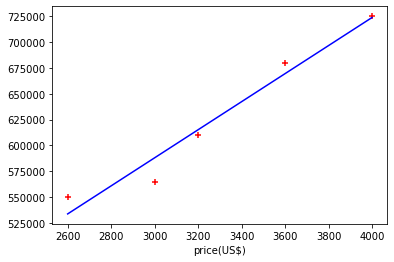

In [6]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.xlabel('price(US$)')
plt.scatter(df.area,df.price, color='red',marker="+")
plt.plot(df.area,reg.predict(df[["area"]]),color='blue')#prediction line in LR

In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)#fitting means training the data

LinearRegression()

# y = m*x + c

In [7]:
reg.predict([[3300]]) # it is "x" (we want to predict)
#here I have convered the scalar array into 2D array reg

array([628715.75342466])

In [8]:
reg.coef_ #it is slope "m"

array([135.78767123])

In [9]:
reg.intercept_ #it is y intercept "c"

180616.43835616432

In [10]:
135.78767123*3300+180616.43835616432
#here the formula y=mx + c is show how the above operation is executed

628715.7534151643

In [11]:
reg.predict([[5000]])

array([859554.79452055])

# Saving the model

In [12]:
import pickle

In [13]:
with open('model_reg','wb') as f:
    pickle.dump(reg,f)

In [14]:
with open('model_reg','rb') as f: 
    mr = pickle.load(f)

In [15]:
mr.predict([[5000]])

array([859554.79452055])

# Prediction for another file and saving the details

In [45]:
d = pd.read_csv(r"C:\Users\Admin\Desktop\codebasic\areas.csv.txt")

In [46]:
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [49]:
p = reg.predict(d)

In [50]:
d['price'] = p #creating new col price in areas

In [52]:
d.to_csv("prediction.csv")#downloading csv file 

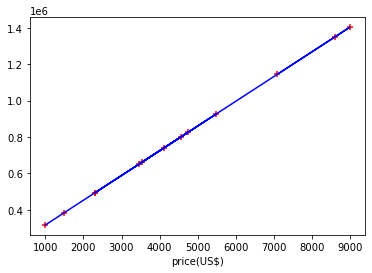

In [58]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.xlabel('price(US$)')
plt.scatter(d.area,d.price, color='red',marker="+")
plt.plot(d.area,reg.predict(d[['area']]),color="blue")

# Linear Regression Multiple variables

In [61]:
df1 = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv")

In [68]:
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [67]:
df1.drop([5],axis=0,inplace=True)

In [69]:
import math
median_bedrooms = math.floor(df1.bedrooms.median())
median_bedrooms

3

In [71]:
df1.bedrooms = df1.bedrooms.fillna(median_bedrooms)#filling Nan values
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [73]:
reg = linear_model.LinearRegression()
reg.fit(df1[['area','bedrooms','age']],df1.price)

LinearRegression()

In [74]:
reg.coef_ #these are m1,m2 and m3

array([   137.25, -26025.  ,  -6825.  ])

In [75]:
reg.intercept_ #this is 'b'

383724.9999999998

In [77]:
reg.predict([[3000,3,40]]) #( m1*3000 + m2*3 + m3*40 + b)

array([444400.])

In [78]:
reg.predict([[2500,4,5]])

array([588625.])